# **REAL ESTATE ANALYSIS (Madrid)**

# RESULTS COMMUNICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Autocomplete quickly
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

# Database connection
con = sa.create_engine('sqlite:///Data/airbnb.db')

# Define relevant columns to load
columns_of_interest = [
    'id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
    'district', 'total_price', 'occupancy', 'bedrooms_disc', 'accommodates_disc',
    'beds_disc', 'number_of_reviews_disc', 'price_m2', 'm2', 'purchase_price', 'poi_sol'
]

# Load only selected columns
df = pd.read_sql('SELECT {} FROM df_prepared'.format(', '.join(columns_of_interest)), con)

# Convert key columns to float
float_cols = ['latitude', 'longitude', 'price', 'total_price', 'purchase_price', 'poi_sol']
df[float_cols] = df[float_cols].astype(float)

# Export cleaned dataset for use in visualization tools
df.to_csv("RE_Analysis_Madrid_dataset.csv", index=False, encoding='utf-8', float_format='%.6f')

#Minicube for price analysis
metrics = ['total_price','purchase_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]

minicube_price = minicube_price.melt(id_vars=['total_price','purchase_price'])

minicube_price = minicube_price.groupby(['variable','value'])[['total_price','purchase_price']].agg('median')

#Minicube for occupancy analysis
metrics_occ = ['occupancy']
dimensions_occ = ['bedrooms_disc', 'accommodates_disc', 'beds_disc', 'number_of_reviews_disc', 'room_type']

minicube_occ = df[dimensions_occ + metrics_occ]

minicube_occ = minicube_occ.melt(id_vars=['occupancy'])

minicube_occ = minicube_occ.groupby(['variable', 'value'])[['occupancy']].median()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24839 entries, 0 to 24838
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      24839 non-null  int64  
 1   neighbourhood           24839 non-null  object 
 2   latitude                24839 non-null  float64
 3   longitude               24839 non-null  float64
 4   room_type               24839 non-null  object 
 5   price                   24839 non-null  float64
 6   district                24839 non-null  object 
 7   total_price             24839 non-null  float64
 8   occupancy               24839 non-null  int64  
 9   bedrooms_disc           24839 non-null  object 
 10  accommodates_disc       24839 non-null  object 
 11  beds_disc               24839 non-null  object 
 12  number_of_reviews_disc  24839 non-null  object 
 13  price_m2                24839 non-null  int64  
 14  m2                      24839 non-null

In [3]:
df.head()

,id,neighbourhood,latitude,longitude,room_type,price,district,total_price,occupancy,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,price_m2,m2,purchase_price,poi_sol
0,21853,Cármenes,40.40381,-3.74130,Private room,29.0,Latina,29.0,36,01_One,1–3,1–2,12–72,3800,50,142500.0,3.521406
1,30320,Sol,40.41476,-3.70418,Entire home/apt,112.0,Centro,112.0,100,01_One,1–3,1–2,73–1080,7198,50,269925.0,0.230175
2,30959,Embajadores,40.41259,-3.70105,Entire home/apt,112.0,Centro,112.0,100,01_One,1–3,1–2,1–11,7198,50,269925.0,0.499379
3,40916,Universidad,40.42247,-3.70577,Entire home/apt,112.0,Centro,112.0,100,01_One,1–3,1–2,12–72,7198,50,269925.0,0.671046
4,62423,Justicia,40.41884,-3.69655,Private room,77.0,Centro,123.2,18,01_One,4–4,1–2,73–1080,7198,50,269925.0,0.621024


## ANALYSIS CONTEXT

The company has selected the city of Madrid as a candidate for identifying properties to invest in, with the aim of generating returns through short-term (tourist) rentals.

To this end, before assigning the investment team to search for opportunities, management has tasked the Data Science team with a Discovery analysis to identify strategies or lines of action that will help guide the investment team's efforts.

## OBJECTIVES

* Analyze available public data sources
* To find insights that help understand the characteristics of the market in this city
* And guide the investment team’s search efforts
* Especially regarding the main focus areas: rental prices, occupancy levels, and purchase prices

## EXECUTIVE SUMMARY

* 14 neighborhoods have been identified as priority areas for property search

* It is recommended to search for one-bedroom properties that can accommodate 4 guests

* It is advisable to focus on properties located within the identified neighborhoods but not necessarily close to points of interest

* It is recommended to search in low and mid-low cost areas due to their apparently better rental efficiency, especially in the San Blas – Canillejas district

* It is recommended to analyze listing-level performance to drive consistent returns

* It is recommended to focus on 1-bedroom units to maximize occupancy efficiency

* It is recommended to focus on listings with fewer beds to maximize occupancy rates

* It is recommended to focus on 1–3 guest configurations to maximize occupancy

* It is recommended to focus on private rooms to maximize occupancy and minimize vacancy risk

* It is recommended to avoid over-prioritizing property size as a driver of occupancy

* It is recommended to understand that competition alone doesn’t determine occupancy outcomes

* Identify opportunities for event-driven rental formats — with San Blas – Canillejas as a top candidate

## DETAILED MAIN FINDINGS

### 14 Neighborhoods Identified with High Investment Potential

* A total of 14 neighborhoods have been identified as having strong potential to maximize the cost-to-income ratio

* These can also be segmented based on the type or quality of the property we are interested in, into four major investment categories

* These are the 14 neighborhoods where we recommend beginning the search for specific opportunities:

    - Low investment: Rosas, Salvador, Arcos, Amposta, Hellín, Comillas, Simancas, Rejas, Canillejas

    - Medium investment: Costillares, Colina

    - Medium-high investment: El Plantío, Jerónimos

    - High investment: Recoletos

Exhibit 1.4.1

15 [-0.74632762 -0.81533494]
59 [-0.75610979 -0.51209204]
45 [0.88417211 0.19961455]
67 [-0.25710469  0.83673729]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


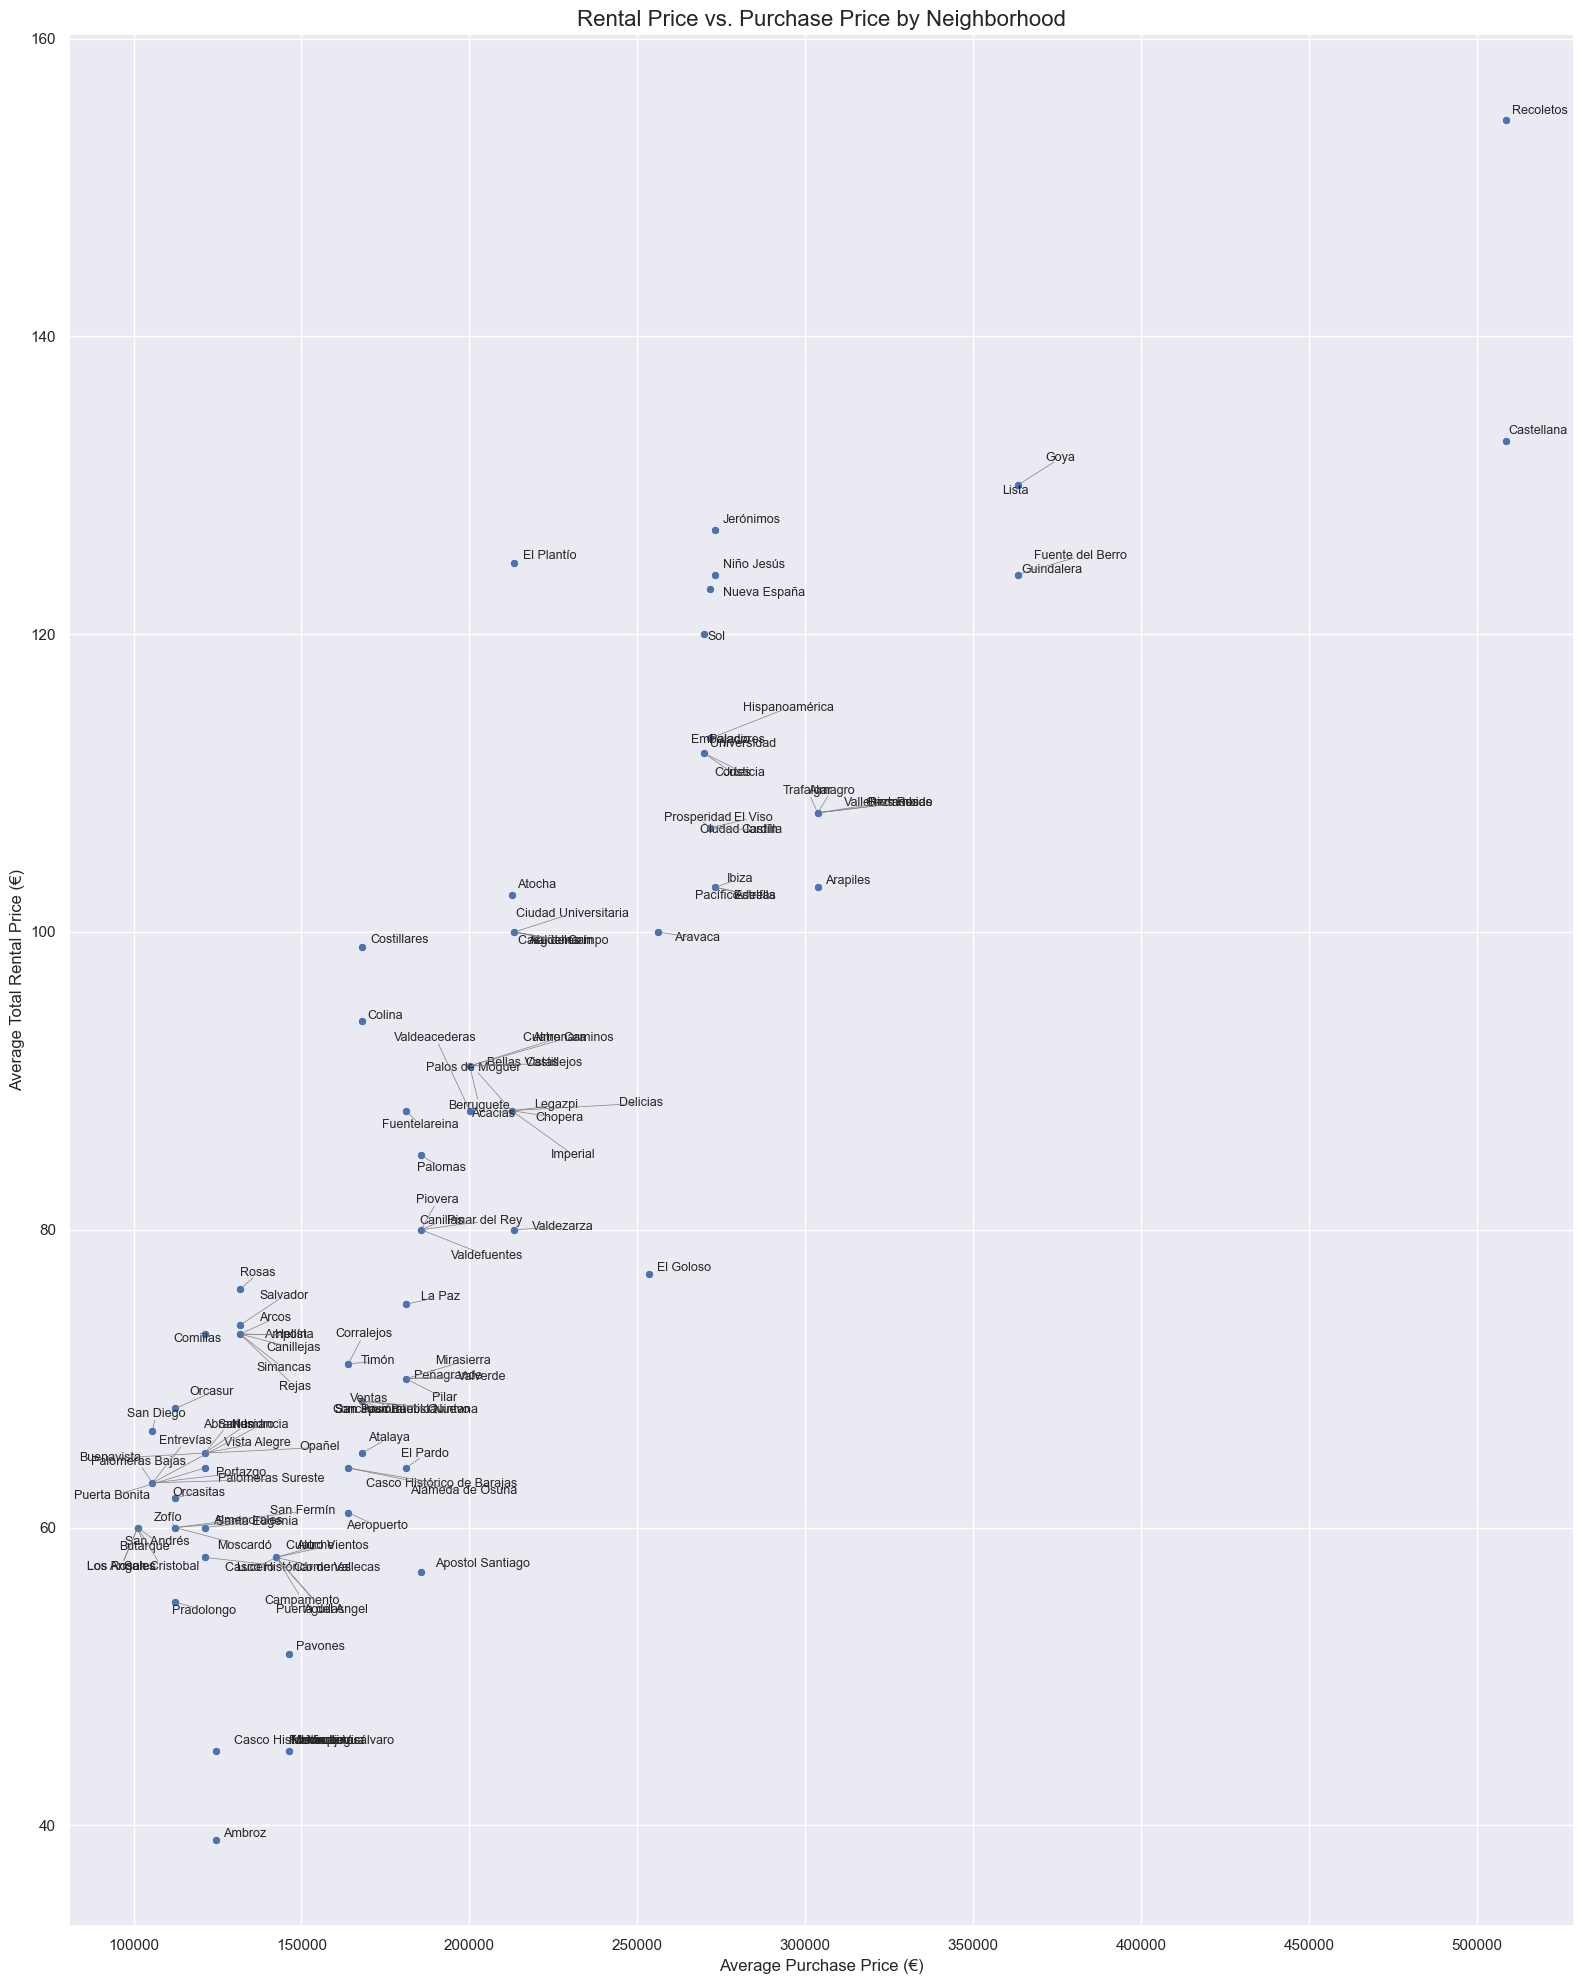

In [5]:
from adjustText import adjust_text

# Grouping by neighborhood and calculating median prices
temp = df.groupby('neighbourhood')[['total_price', 'purchase_price']].median()

sns.set_theme()
plt.figure(figsize=(16, 20))

# Scatterplot for neighborhood-level analysis
sns.scatterplot(data=temp, x='purchase_price', y='total_price')

# Create text labels
texts = []
for i in range(temp.shape[0]):
    texts.append(
        plt.text(
            temp.purchase_price.iloc[i],
            temp.total_price.iloc[i],
            temp.index[i],
            fontsize=9
        )
    )

# Automatically adjust labels to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color='gray', lw=0.5, shrinkA=5),
    expand_text=(1.1, 1.2),
    force_points=0.4,
    force_text=0.6,
    only_move={'points': 'y', 'text': 'xy'}
)

plt.title('Rental Price vs. Purchase Price by Neighborhood', fontsize=16)
plt.xlabel('Average Purchase Price (€)', fontsize=12)
plt.ylabel('Average Total Rental Price (€)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Search for one-bedroom properties that can accommodate 4 guests

* The number of guests that maximizes the purchase price paid is 4

Exhibit 1.4.2

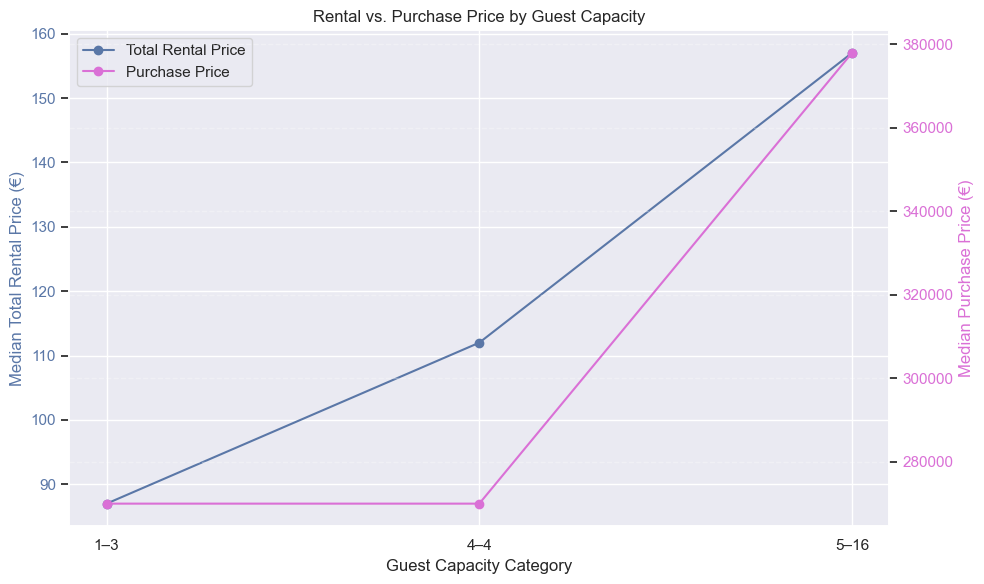

In [6]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis: Total Rental Price
ax1.plot(
    minicube_price.loc['accommodates_disc'].index,
    minicube_price.loc['accommodates_disc']['total_price'],
    color='#5a77a7',
    marker='o',
    label='Total Rental Price'
)
ax1.set_xlabel('Guest Capacity Category')
ax1.set_ylabel('Median Total Rental Price (€)', color='#5a77a7')
ax1.tick_params(axis='y', labelcolor='#5a77a7')

# Second axis: Purchase Price
ax2 = ax1.twinx()
ax2.plot(
    minicube_price.loc['accommodates_disc'].index,
    minicube_price.loc['accommodates_disc']['purchase_price'],
    color='orchid', #mediumvioletred
    marker='o',
    label='Purchase Price'
)
ax2.set_ylabel('Median Purchase Price (€)', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

# Title and formatting
plt.title('Rental vs. Purchase Price by Guest Capacity')
fig.tight_layout()

# Add combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Optional: Add subtle grid
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Search for properties within the identified neighborhoods but not necessarily close to points of interest

* These properties are likely to have lower purchase prices

* Proximity to points of interest does not appear to significantly impact rental prices

* Being close to Puerta del Sol does not guarantee higher occupancy, highlighting the need to look beyond centrality

* Location matters — but not in isolation. Even well-located units must deliver on guest expectations (value, comfort, experience) to achieve strong performance

Exhibit 1.4.3

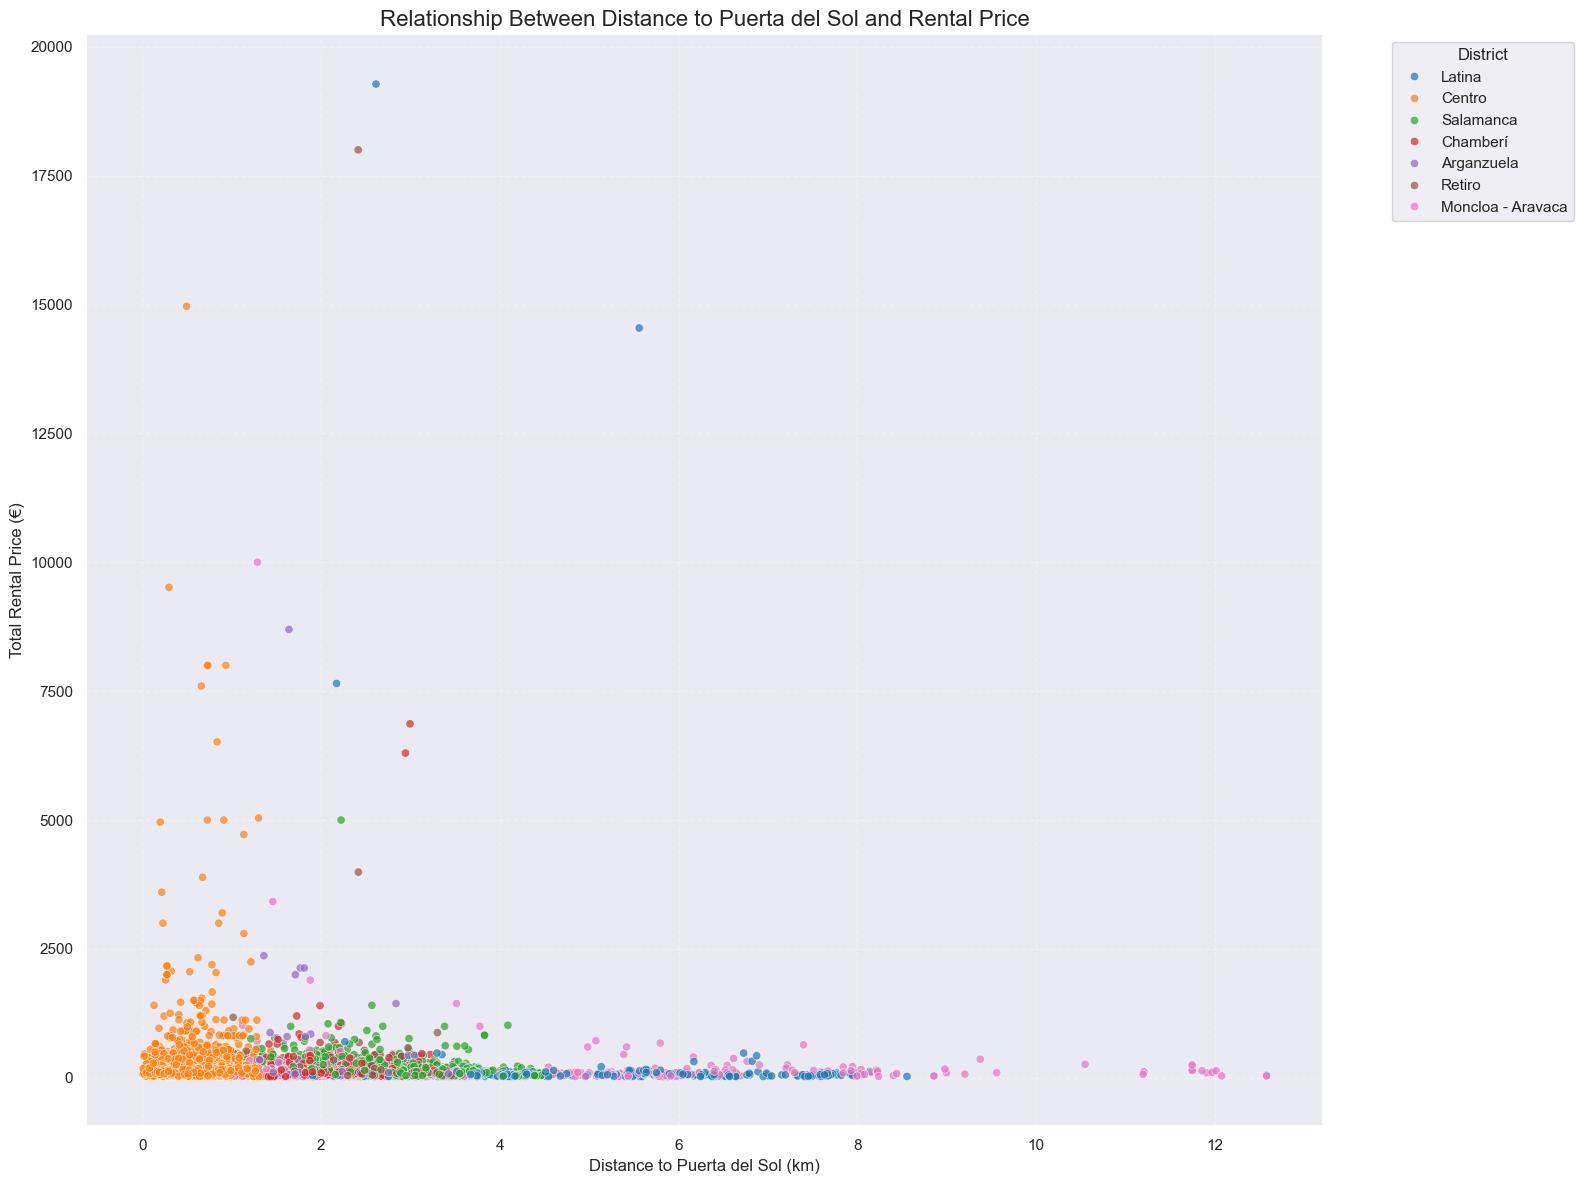

In [7]:
# Select the 7 districts closest to Puerta del Sol based on median distance
selected_districts = (
    df.groupby('district')['poi_sol']
    .median()
    .sort_values()
    .head(7)
    .index
    .tolist()
)

# Filter data for those districts
filtered_df = df[df['district'].isin(selected_districts)]

# Plot
sns.set_theme()
plt.figure(figsize=(16, 12))
sns.scatterplot(data=filtered_df, x='poi_sol', y='total_price', hue='district', palette='tab10', alpha=0.7)

# Add labels and formatting
plt.title('Relationship Between Distance to Puerta del Sol and Rental Price', fontsize=16)
plt.xlabel('Distance to Puerta del Sol (km)', fontsize=12)
plt.ylabel('Total Rental Price (€)', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Exhibit 1.4.4

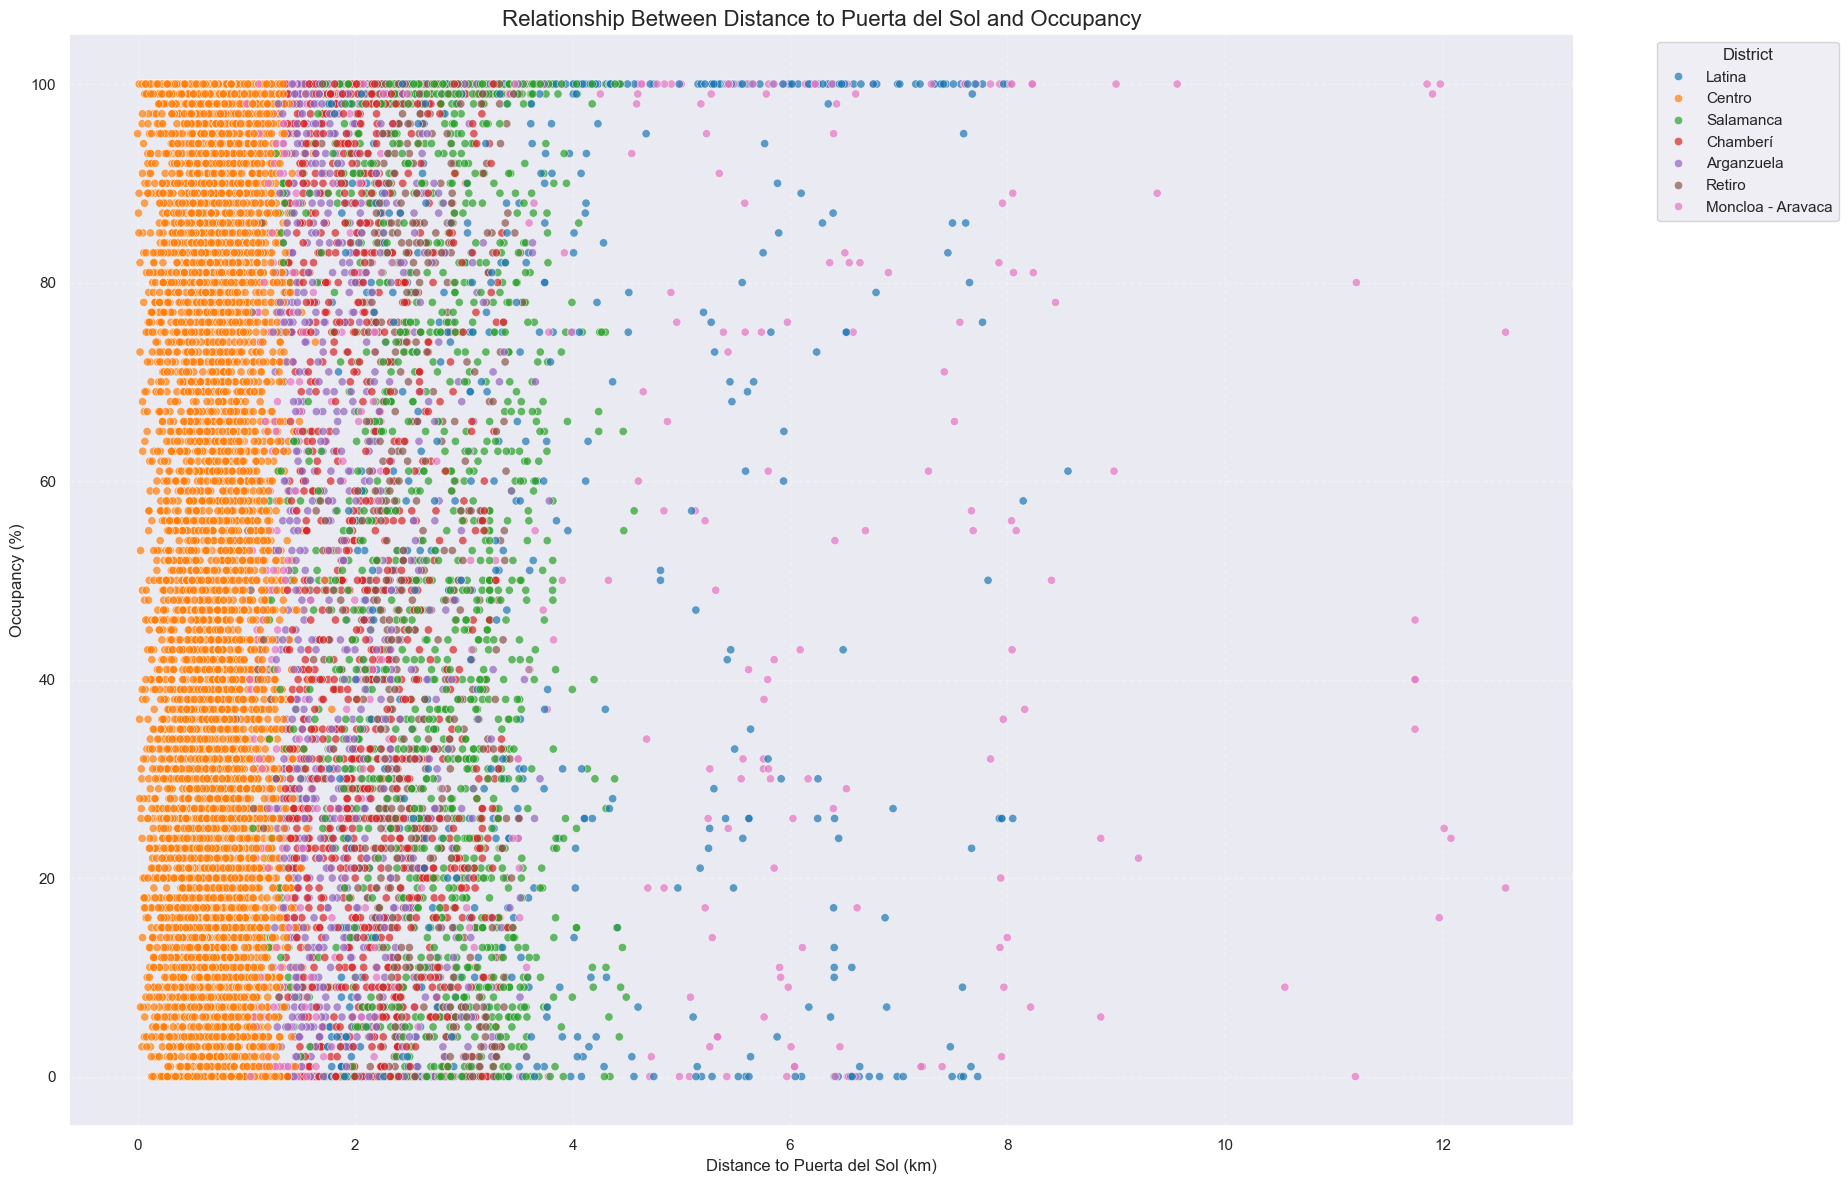

In [8]:
# Scatterplot: Occupancy vs. distance to Puerta del Sol, for selected districts
plt.figure(figsize=(16, 12))
sns.scatterplot(
    data=df[df['district'].isin(selected_districts)],
    x='poi_sol',
    y='occupancy',
    hue='district',  # Color by district
    alpha=0.7,
    palette='tab10'
)

# Titles and axis labels
plt.title('Relationship Between Distance to Puerta del Sol and Occupancy', fontsize=16)
plt.xlabel('Distance to Puerta del Sol (km)', fontsize=12)
plt.ylabel('Occupancy (%)', fontsize=12)

# Add legend and formatting
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Search in low and mid-low cost areas for their apparent better rental efficiency

* Lower-cost and mid-lower cost areas may offer better rental efficiency, especially for investors focused on maximizing occupancy and short-term yield

* San Blas – Canillejas stands out for its high occupancy rates and spikes in rental prices during major events, driven by its proximity to venues such as IFEMA and the Wanda Metropolitano Stadium. This district is well-suited for event-driven investment strategies, although it may pose higher risk for those prioritizing stable, year-round returns

* Tetuán offers a favorable price-to-rent ratio, with relatively high rental prices despite low occupancy levels. This points to untapped potential, where improving utilization could unlock strong returns — particularly for investors focusing on micro-location dynamics and property differentiation

Exhibit 1.4.5

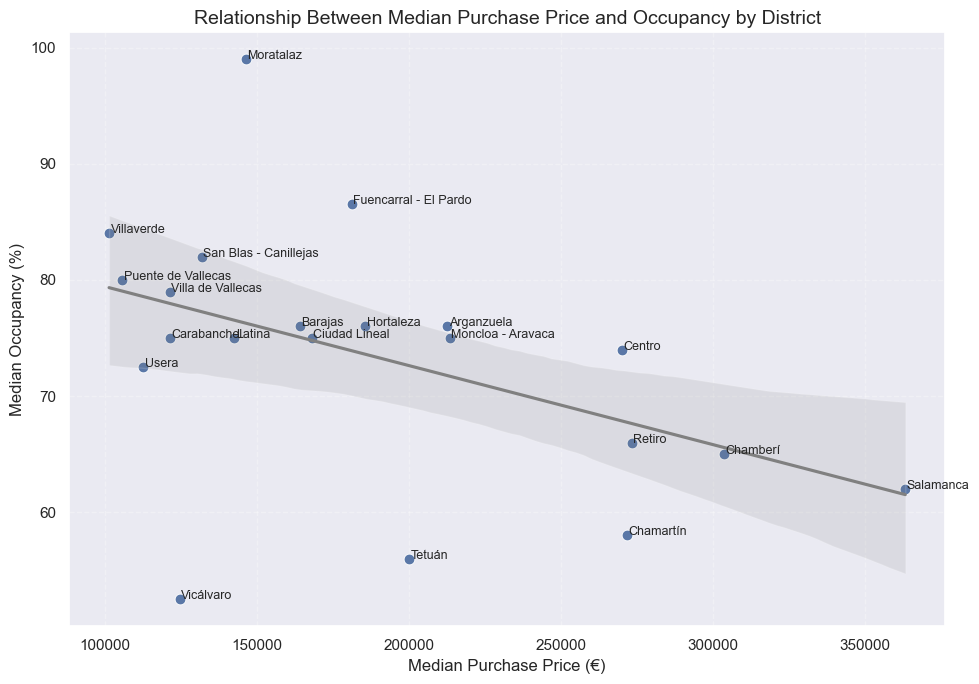

In [9]:
# Group by district and calculate median purchase price and median occupancy
price_occupancy_relation = (
    df.groupby('district')[['purchase_price', 'occupancy']]
    .median()
    .reset_index()
)

# Create scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=price_occupancy_relation,
    x='purchase_price',
    y='occupancy',
    s=60,
    color='#5a77a7'
)

# Add regression line
sns.regplot(data=price_occupancy_relation, x='purchase_price', y='occupancy', scatter=False, color='gray')

# Annotate each point with the district name
for i in range(price_occupancy_relation.shape[0]):
    plt.text(
        x=price_occupancy_relation.purchase_price[i] + 500,
        y=price_occupancy_relation.occupancy[i],
        s=price_occupancy_relation.district[i],
        fontsize=9
    )

# Titles and labels
plt.title('Relationship Between Median Purchase Price and Occupancy by District', fontsize=14)
plt.xlabel('Median Purchase Price (€)', fontsize=12)
plt.ylabel('Median Occupancy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Analyze listing-level performance to drive consistent returns

* Occupancy rates vary significantly within districts, even in both high- and low-demand areas. This suggests that while some units perform very well, many others underperform — regardless of location

* Smart investors should focus on listing-level factors such as photos, reviews, pricing, and host status to unlock consistent rental performance

Exhibit 1.4.6

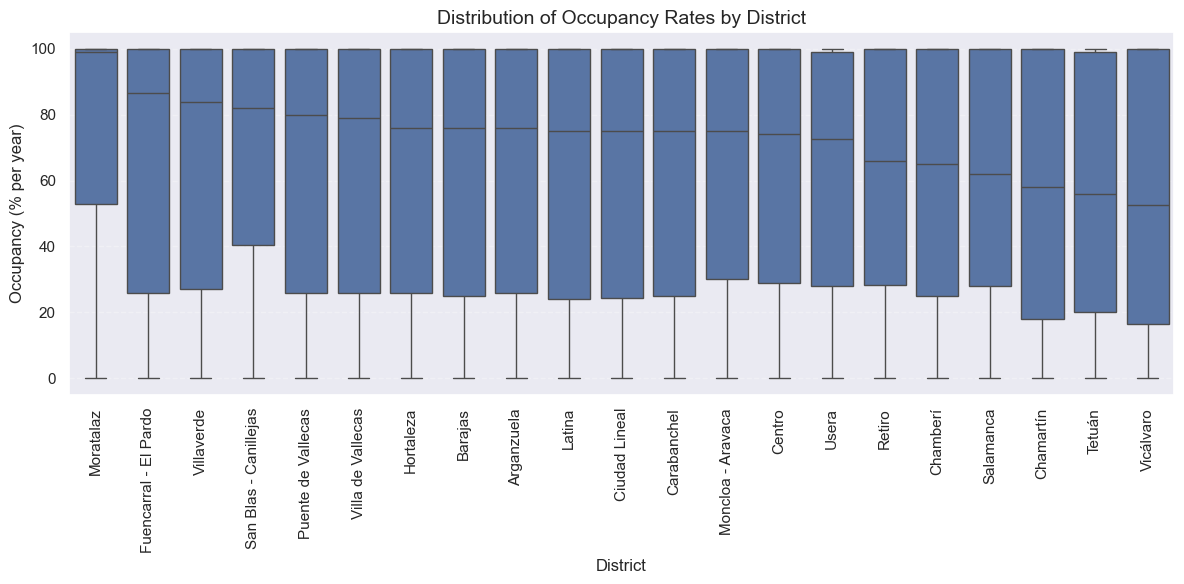

In [10]:
# Boxplot: Occupancy distribution by district
plt.figure(figsize=(12, 6))
order = df.groupby('district')['occupancy'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='district', y='occupancy', order=order)

# Titles and axis labels
plt.title('Distribution of Occupancy Rates by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Occupancy (% per year)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Focus on 1-bedroom units to maximize occupancy efficiency

* 1-bedroom apartments reach the highest occupancy rates, outperforming all other categories

* This trend highlights a strategic opportunity to invest in smaller, high-demand properties favored by solo travelers and couples

Exhibit 1.4.7

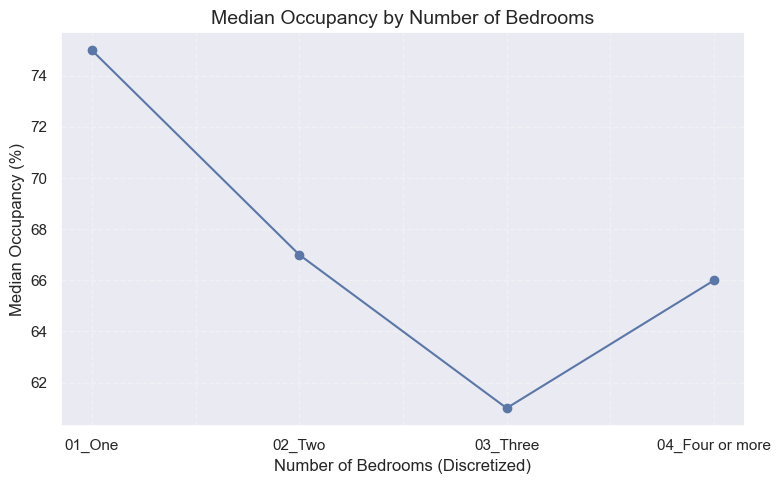

In [11]:
# Line plot: Median occupancy by number of bedrooms
plt.figure(figsize=(8, 5))
minicube_occ.loc['bedrooms_disc']['occupancy'].plot(kind='line', marker='o', color='#5a77a7')

# Titles and labels
plt.title('Median Occupancy by Number of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms (Discretized)', fontsize=12)
plt.ylabel('Median Occupancy (%)', fontsize=12)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Focus on listings with fewer beds to maximize occupancy rates

* Listings with 1–2 beds achieve the highest occupancy, while properties with 4 or more beds drop sharply below 55%

* Adding more beds doesn’t guarantee higher utilization — and may even reduce it if comfort, layout, or pricing flexibility is compromised

* Urban demand is dominated by couples and solo travelers, reinforcing that designing for comfort and fit, not sheer capacity, is key to maximizing returns

Exhibit 1.4.8

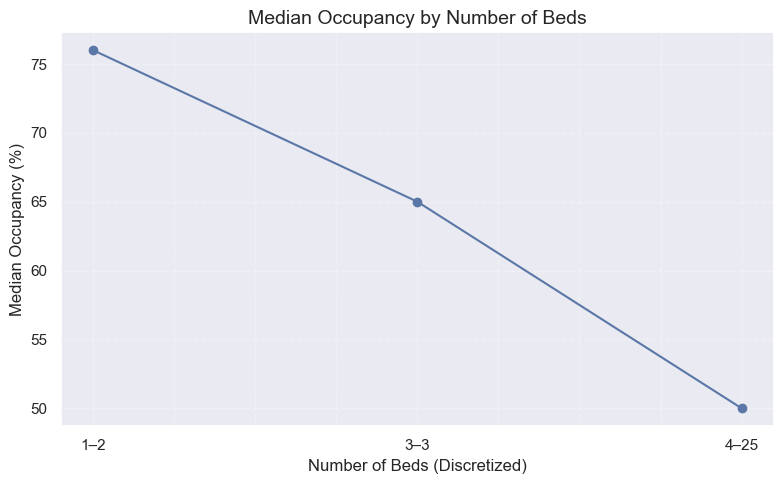

In [12]:
# Line plot: Median occupancy by number of beds
plt.figure(figsize=(8, 5))
minicube_occ.loc['beds_disc']['occupancy'].plot(kind='line', marker='o', color='#5a77a7')

# Titles and labels
plt.title('Median Occupancy by Number of Beds', fontsize=14)
plt.xlabel('Number of Beds (Discretized)', fontsize=12)
plt.ylabel('Median Occupancy (%)', fontsize=12)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Focus on 1–3 guest configurations to maximize occupancy

* Properties accommodating 1–3 guests achieve the highest occupancy rates

* Smaller capacities better match core demand segments — primarily solo travelers, couples, and friends

Exhibit 1.4.9

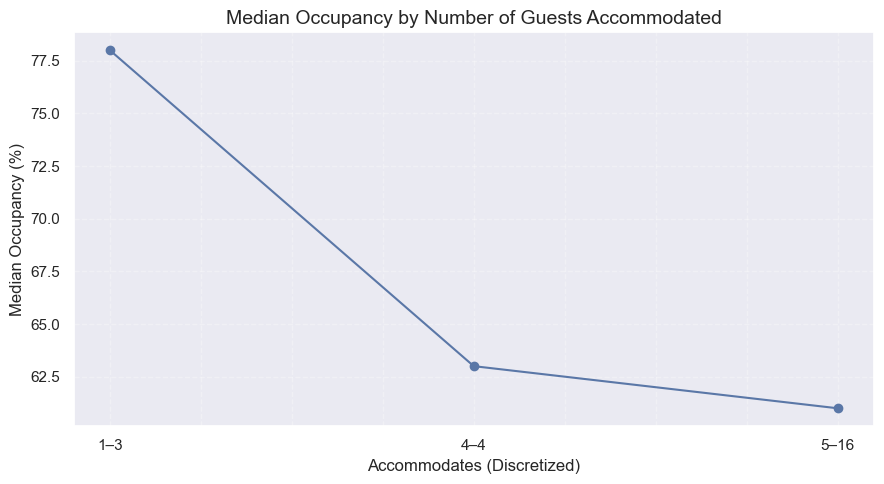

In [13]:
# Line plot: Median occupancy by discretized number of accommodates
plt.figure(figsize=(9, 5))
minicube_occ.loc['accommodates_disc']['occupancy'].plot(kind='line', marker='o', color='#5a77a7')

# Set titles and axis labels
plt.title('Median Occupancy by Number of Guests Accommodated', fontsize=14)
plt.xlabel('Accommodates (Discretized)', fontsize=12)
plt.ylabel('Median Occupancy (%)', fontsize=12)

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Focus on private rooms to maximize occupancy and minimize vacancy risk

* Private rooms deliver superior utilization, making them ideal for high-occupancy strategies and steady monthly income

Exhibit 1.4.10

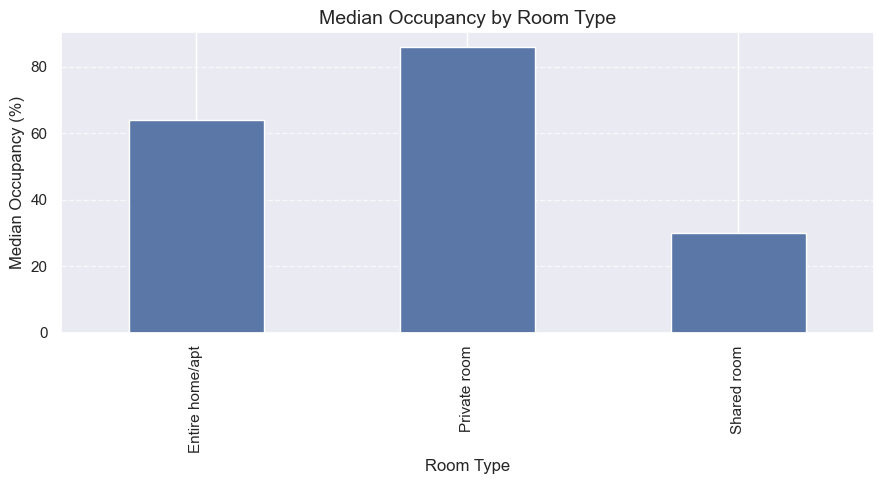

In [14]:
# Bar chart: Median occupancy by room type
plt.figure(figsize=(9, 5))
minicube_occ.loc['room_type']['occupancy'].plot(kind='bar', color='#5a77a7')

# Titles and labels
plt.title('Median Occupancy by Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Median Occupancy (%)', fontsize=12)

# Add horizontal grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Avoid over-prioritizing property size as a driver of occupancy

* While smaller units (~50 m²) show a slightly higher median occupancy, all size categories exhibit wide, overlapping distributions, indicating high variability

* Other features — such as location, price, amenities, and room type — likely have greater influence on utilization rates

* Property size may still inform guest experience or pricing, but it should not be treated as a primary lever when optimizing for occupancy

Exhibit 1.4.11

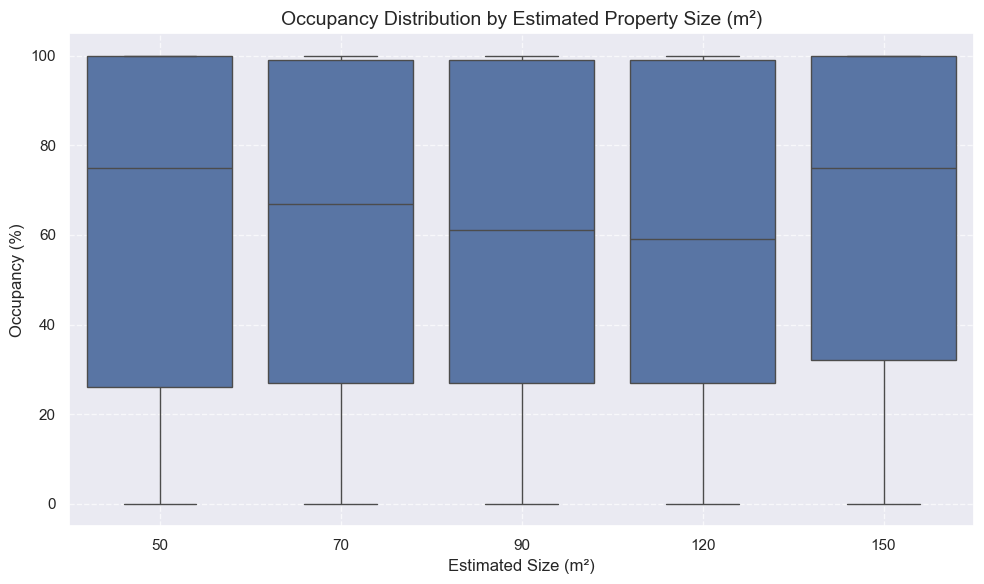

In [15]:
# Boxplot: Occupancy variation across property sizes
plt.figure(figsize=(10, 6))
sns.boxplot(x='m2', y='occupancy', data=df)

# Titles and axis labels
plt.title('Occupancy Distribution by Estimated Property Size (m²)', fontsize=14)
plt.xlabel('Estimated Size (m²)', fontsize=12)
plt.ylabel('Occupancy (%)', fontsize=12)

# Add grid for easier comparison
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exhibit 1.4.12

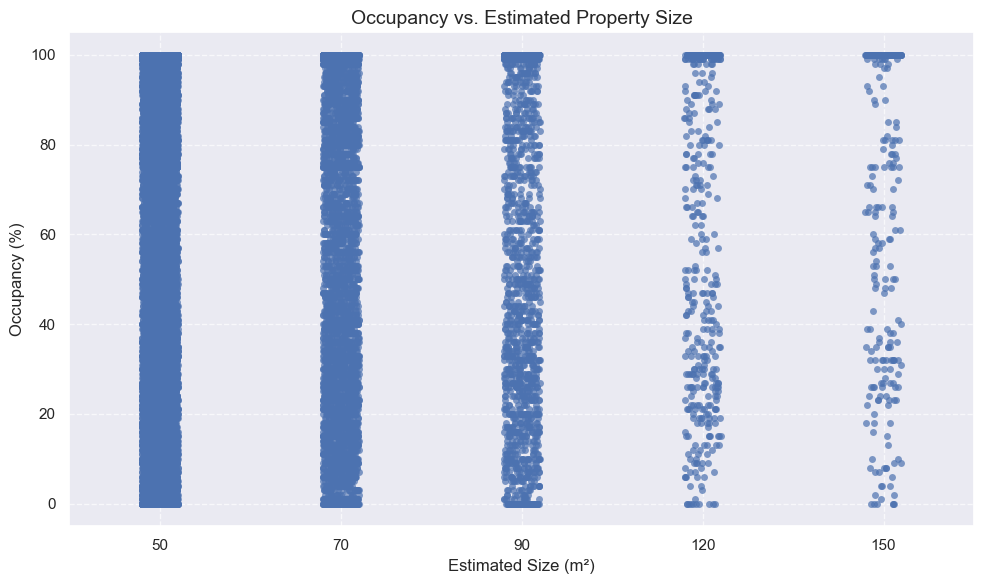

In [16]:
# Scatter-style plot to show overall trend and dispersion
plt.figure(figsize=(10, 6))
sns.stripplot(x='m2', y='occupancy', data=df, jitter=True, alpha=0.7)

# Titles and labels
plt.title('Occupancy vs. Estimated Property Size', fontsize=14)
plt.xlabel('Estimated Size (m²)', fontsize=12)
plt.ylabel('Occupancy (%)', fontsize=12)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Competition alone doesn’t determine occupancy outcomes

* High competition does not automatically imply lower occupancy

* There is no clear linear relationship between competition and occupancy rates

* Strategic factors like location appeal, property characteristics, and market positioning may outweigh pure listing volume when it comes to maintaining high occupancy

Exhibit 1.4.13

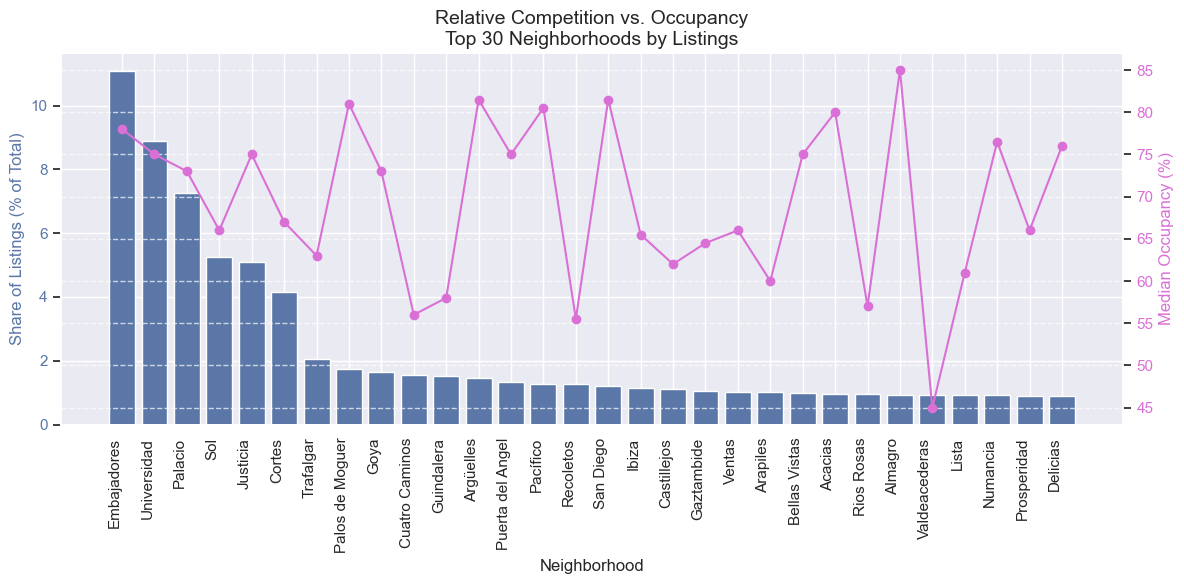

In [17]:
# Group by neighborhood: calculate listing count and median occupancy
competition_occupancy = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).reset_index()

# Calculate relative competition as a percentage of total listings
total_listings = competition_occupancy['listings_count'].sum()
competition_occupancy['relative_competition'] = (
    100 * competition_occupancy['listings_count'] / total_listings
)

# Select the top 30 neighborhoods by listing count
top_competition = (
    competition_occupancy
    .sort_values(by='listings_count', ascending=False)
    .head(30)
)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: Relative competition (share of total listings)
ax1.bar(
    top_competition['neighbourhood'],
    top_competition['relative_competition'],
    color='#5a77a7'
)
ax1.set_ylabel('Share of Listings (% of Total)', color='#5a77a7')
ax1.set_xlabel('Neighborhood')
ax1.set_title('Relative Competition vs. Occupancy\nTop 30 Neighborhoods by Listings', fontsize=14)

# Format x-axis labels
ax1.set_xticks(range(len(top_competition['neighbourhood'])))
ax1.set_xticklabels(top_competition['neighbourhood'], rotation=90, ha='right')
ax1.tick_params(axis='y', labelcolor='#5a77a7')

# Line chart: Median occupancy per neighborhood
ax2 = ax1.twinx()
ax2.plot(
    top_competition['neighbourhood'],
    top_competition['median_occupancy'],
    color='orchid',
    marker='o',
    label='Median Occupancy'
)
ax2.set_ylabel('Median Occupancy (%)', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exhibit 1.4.14

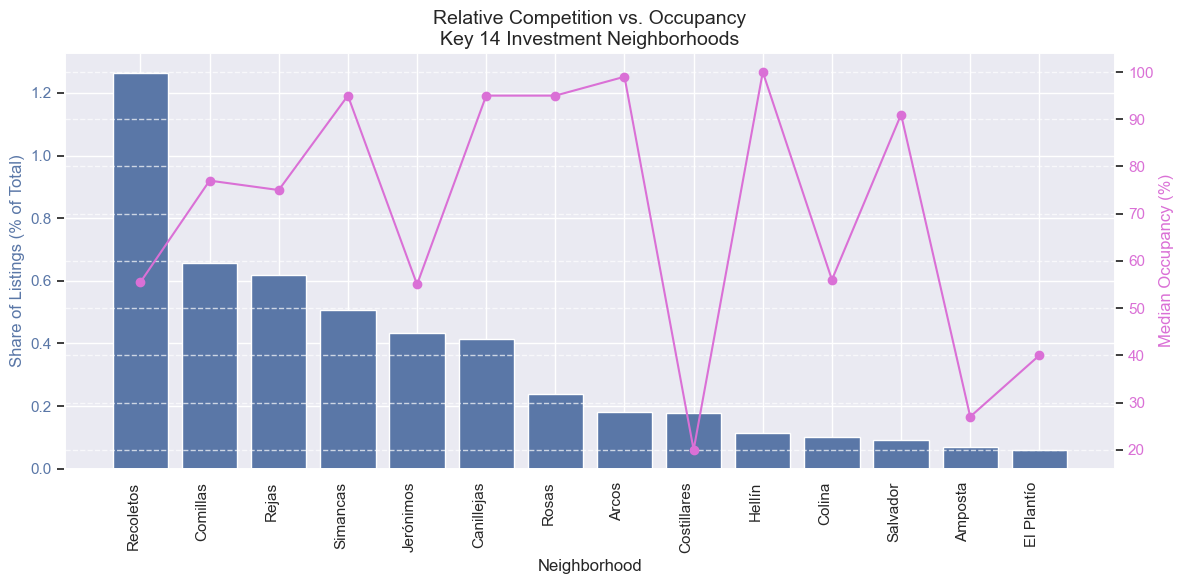

In [18]:
# Define the 14 key neighborhoods by investment category
key_neighborhoods = [
    # Low investment
    'Rosas', 'Salvador', 'Arcos', 'Amposta', 'Hellín', 'Comillas', 'Simancas', 'Rejas', 'Canillejas',
    # Medium investment
    'Costillares', 'Colina',
    # Medium-high investment
    'El Plantío', 'Jerónimos',
    # High investment
    'Recoletos'
]

# Group all neighborhoods: listings + median occupancy
competition_occupancy = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).reset_index()

# Calculate relative competition (% of total listings in Madrid)
total_listings_madrid = competition_occupancy['listings_count'].sum()
competition_occupancy['relative_competition'] = (
    100 * competition_occupancy['listings_count'] / total_listings_madrid
)

# Filter to keep only the 14 key neighborhoods (but retain their % of total Madrid)
key_competition = competition_occupancy[competition_occupancy['neighbourhood'].isin(key_neighborhoods)].copy()

# Sort for clarity (optional: by name, occupancy, or relative_competition)
key_competition = key_competition.sort_values(by='relative_competition', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: relative competition
ax1.bar(key_competition['neighbourhood'], key_competition['relative_competition'], color='#5a77a7')
ax1.set_ylabel('Share of Listings (% of Total)', color='#5a77a7')
ax1.set_xlabel('Neighborhood')
ax1.set_xticks(range(len(key_competition['neighbourhood'])))
ax1.set_xticklabels(key_competition['neighbourhood'], rotation=90, ha='right')
ax1.tick_params(axis='y', labelcolor='#5a77a7')
ax1.set_title('Relative Competition vs. Occupancy\nKey 14 Investment Neighborhoods', fontsize=14)

# Line chart: median occupancy
ax2 = ax1.twinx()
ax2.plot(key_competition['neighbourhood'], key_competition['median_occupancy'], color='orchid', marker='o')
ax2.set_ylabel('Median Occupancy (%)', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Evaluate strategic rental positioning for event-driven demand

* Consider opportunities in Salamanca (high investment), Moncloa - Aravaca (mid investment), and San Blas – Canillejas (low investment)

* Specifically, San Blas – Canillejas shows underutilized potential for capturing short-term spikes in demand (*see* Exhibit 1.4.16)

Exhibit 1.4.15

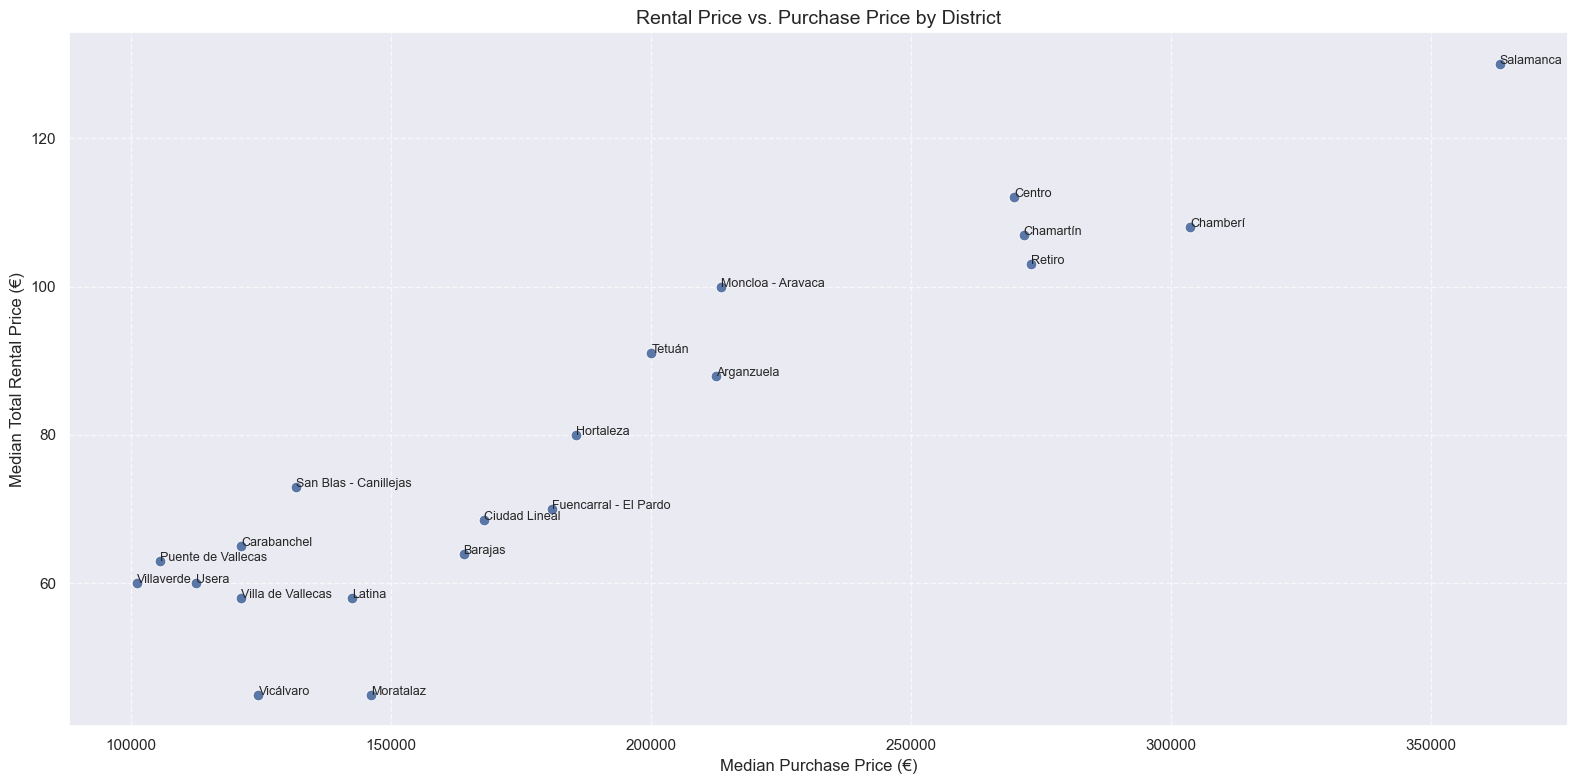

In [19]:
# Group by district: calculate median purchase and rental prices
temp = df.groupby('district')[['total_price', 'purchase_price']].median()

# Create scatterplot
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=temp,
    x='purchase_price',
    y='total_price',
    color='#5a77a7',
    s=60
)

# Annotate each point with district name
for i in range(temp.shape[0]):
    plt.text(
        x=temp.purchase_price.iloc[i],
        y=temp.total_price.iloc[i],
        s=temp.index[i],
        fontsize=9
    )

# Add labels and title
plt.title('Rental Price vs. Purchase Price by District', fontsize=14)
plt.xlabel('Median Purchase Price (€)', fontsize=12)
plt.ylabel('Median Total Rental Price (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exhibit 1.4.16

In [20]:
import folium
from branca.element import Template, MacroElement

# Filter listings in the selected district
data = df[df.district == 'San Blas - Canillejas'].copy()

# Dracula Light-inspired color palette
dracula_colors = ['#f1fa8c',  # soft yellow
                  '#ff79c6',  # pink
                  '#8be9fd',  # cyan
                  '#bd93f9']  # purple

# Discretize total price into 4 quartiles and assign corresponding colors
data['total_price_disc'] = pd.qcut(
    data['total_price'],
    q=[0, .25, .5, .75, 1.],
    labels=dracula_colors
)

# Create interactive map centered on Madrid
map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

# Plot each listing as a circle marker
for flat in range(len(data)):
    folium.CircleMarker(
        location=[data.iloc[flat]['latitude'], data.iloc[flat]['longitude']],
        popup=f"Price: €{data.iloc[flat]['total_price']}",
        fill=True,
        color=data.iloc[flat]['total_price_disc'],
        fill_opacity=1,
        radius=5
    ).add_to(map)

# Define the custom legend using HTML and CSS
legend_html = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 180px;
    height: 130px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.3);
">
<b>Price Quartiles</b><br>
<i style="background:#f1fa8c;width:12px;height:12px;display:inline-block;margin-right:5px;"></i> Lowest 25%<br>
<i style="background:#ff79c6;width:12px;height:12px;display:inline-block;margin-right:5px;"></i> 25% - 50%<br>
<i style="background:#8be9fd;width:12px;height:12px;display:inline-block;margin-right:5px;"></i> 50% - 75%<br>
<i style="background:#bd93f9;width:12px;height:12px;display:inline-block;margin-right:5px;"></i> Top 25%<br>
</div>

{% endmacro %}
"""

# Add legend to the map
legend = MacroElement()
legend._template = Template(legend_html)
map.get_root().add_child(legend)

map